In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
pwd = os.getcwd()

In [2]:
## user defined variables
folder = '2m'
bathy_name = 'sinclair_inlet_seattle_7000x2500_2m_res_filter_5.txt'
boundary = 'left' #side of channel

distance = 100 # distance between profiles

# zoomed in to area of interest sinclair
initX = 500 # initial x coordinate 
finalX = 2500 # final x coordinate 
initY = 3500 # initial y coordinate 
finalY = 10000 # final y coordinate

## zoomed in to area of interest hood canal
#initX = 3500 # initial x coordinate 
#finalX = 7000 # final x coordinate 
#initY = 12000 # initial y coordinate 
#finalY = 24000 # final y coordinate

# paths
BathyPath = os.path.join(pwd,folder,bathy_name)
PngPath = os.path.join(pwd,"station_files",'stations'+bathy_name[:-4]+'.png')
funwaveStationPath = os.path.join(pwd,"station_files","stations_"+bathy_name)

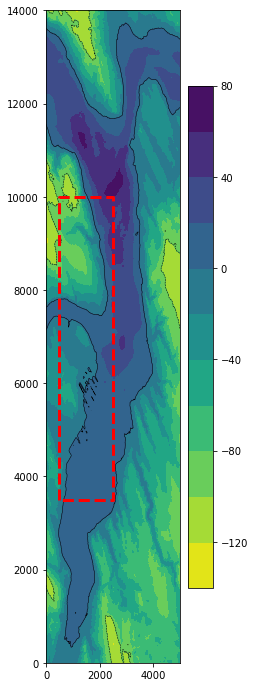

In [3]:
## upload bathy/grid
depth = np.loadtxt(BathyPath)

[Ny,Nx] = np.shape(depth)

if folder == '5m':
    newDx = 5.0
    newDy = 5.0
else:
    newDx = 2.0
    newDy = 2.0

#bathy origins
x0 = 0
y0 = 0

x = np.linspace(x0,x0+(Nx*newDx),Nx)
y = np.linspace(y0,y0+(Ny*newDy),Ny)

# plot the complete grid with "closeup square"
square_x = [initX, initX,initX,finalX,finalX,finalX,finalX,initX]
square_y = [initY, finalY,finalY,finalY,finalY,initY,initY,initY]

fig, ax = plt.subplots(1,1,figsize=(3,12))
CS1 = plt.contour(x, y,depth,1, linewidths=0.5, colors='k')
CS2 = plt.contourf(x, y,depth,11, cmap = 'viridis_r')
plt.plot(square_x,square_y,'--r',linewidth = 3)
plt.colorbar()

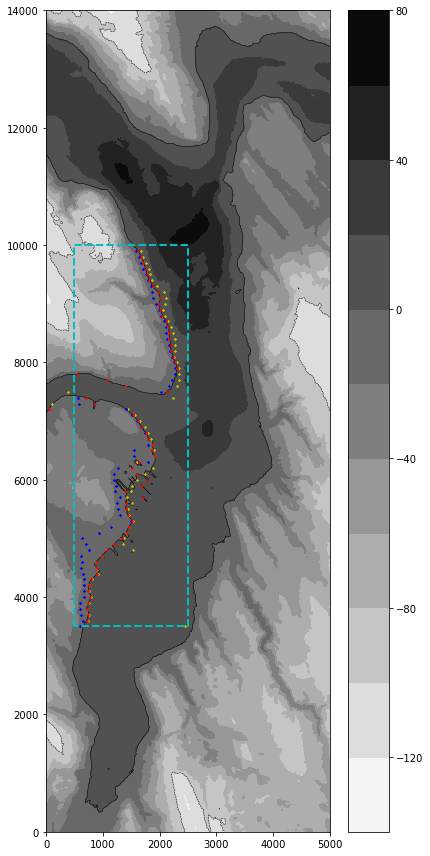

In [4]:
def find_nearest(array, value): # find closest point to y station corrdinate
    array = np.asarray(array)
    idx = int(np.argmin(abs(array - value))) 
    return idx

initX_ind = find_nearest(x,initX)
finalX_ind = find_nearest(x,finalX)

y_profile_list = np.arange(initY,finalY,distance)

j_profile_list = []
i_profile_list_0 = []
i_profile_list_5 = []
i_profile_list_5neg = []

for i in range(len(y_profile_list)):
    j = find_nearest(y,y_profile_list[i])
    j_profile_list.append(j) 
    
    if boundary == "right":
        i_x0 = find_nearest(depth[j,initX_ind:],0)+initX_ind
        i_x5 = find_nearest(depth[j,initX_ind:],5)+initX_ind
        i_x5neg = find_nearest(depth[j,initX_ind:],-5)+initX_ind
    elif boundary == "left":   
        i_x0 = find_nearest(depth[j,:finalX_ind],0)
        i_x5 = find_nearest(depth[j,:finalX_ind],5)
        i_x5neg = find_nearest(depth[j,:finalX_ind],-5)
    
    i_profile_list_0.append(i_x0)
    i_profile_list_5.append(i_x5)
    i_profile_list_5neg.append(i_x5neg)
    
fig, ax = plt.subplots(1,1,figsize=(6,12))
CS1 = plt.contour(x, y,depth,1, linewidths=0.5, colors='k')
CS2 = plt.contourf(x, y,depth,11, cmap = 'binary')

plt.plot(x[i_profile_list_5], y[j_profile_list],'y*',markersize=2)
plt.plot(x[i_profile_list_5neg], y[j_profile_list],'b*',markersize=2)
plt.plot(x[i_profile_list_0], y[j_profile_list],'r*',markersize=2)

plt.plot(square_x,square_y,'--c',linewidth = 2)
plt.colorbar()
plt.tight_layout()
plt.savefig(PngPath,dpi=300)

In [5]:
## save station File
fileOut = open(funwaveStationPath,'w')
print('Saving File:',funwaveStationPath)

for i in range(len(j_profile_list)):
    line = str('%d  %d\n'%(int(i_profile_list_0[i]),int(j_profile_list[i])))
    fileOut.write(line)

for j in range(len(j_profile_list)):
    line = str('%d  %d\n'%(int(i_profile_list_5[j]),int(j_profile_list[j])))
    fileOut.write(line)

for k in range(len(j_profile_list)):
    line = str('%d  %d\n'%(int(i_profile_list_5neg[k]),int(j_profile_list[k])))
    fileOut.write(line)
        
fileOut.close()

Saving File: /Users/rdchlgs8/Desktop/nuke/station_files/stations_sinclair_inlet_seattle_7000x2500_2m_res_filter_5.txt


In [7]:
diff_5 = []
diff_5neg = []

for i in range(len(j_profile_list)):
    diff_5.append(- x[i_profile_list_0[i]] + x[i_profile_list_5[i]])
    diff_5neg.append(- x[i_profile_list_5neg[i]] + x[i_profile_list_0[i]])
    
print("average diff 5m to 0m:",abs(np.average(diff_5)))
print("average diff -5m to 0m:",abs(np.average(diff_5neg)))

print("min diff 5m to 0m:",abs(np.min(diff_5)))
print("min diff -5m to 0m:",abs(np.min(diff_5neg)))

print("max diff 5m to 0m:",abs(np.max(diff_5)))
print("max diff -5m to 0m:",abs(np.max(diff_5neg)))

average diff 5m to 0m: 132.94548588666234
average diff -5m to 0m: 63.16372702927325
min diff 5m to 0m: 1746.6986794717884
min diff -5m to 0m: 1716.6866746698677
max diff 5m to 0m: 1800.720288115246
max diff -5m to 0m: 692.2769107643057
